# Predict Brain Stroke Using Logistic Regression Model

## Objective

**Use Logistic Regression Model to predict brain stroke**

## Imports

In [243]:
import seaborn as sns
import pandas as pd

## Exploratory Data Analysis (EDA)

In [244]:
data = pd.read_csv('brain_stroke.csv')

In [245]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [246]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [247]:
data.count()

gender               4981
age                  4981
hypertension         4981
heart_disease        4981
ever_married         4981
work_type            4981
Residence_type       4981
avg_glucose_level    4981
bmi                  4981
smoking_status       4981
stroke               4981
dtype: int64

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [249]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [250]:
data['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [251]:
data['age'].value_counts()

78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

In [252]:
data['hypertension'].value_counts()

0    4502
1     479
Name: hypertension, dtype: int64

In [253]:
data['heart_disease'].value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

In [254]:
data['avg_glucose_level'].value_counts()

93.88     6
73.00     5
83.16     5
91.85     5
72.49     5
         ..
130.56    1
67.78     1
116.12    1
59.63     1
83.94     1
Name: avg_glucose_level, Length: 3895, dtype: int64

In [255]:
data['bmi'].value_counts()

28.7    42
28.4    41
27.3    38
27.7    37
26.7    37
        ..
48.4     1
48.2     1
46.6     1
40.6     1
14.9     1
Name: bmi, Length: 342, dtype: int64

In [256]:
data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [257]:
data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

## Data Visualization

<AxesSubplot:>

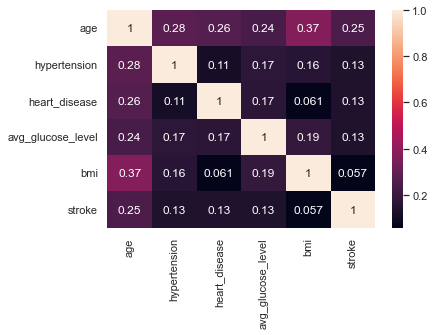

In [258]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

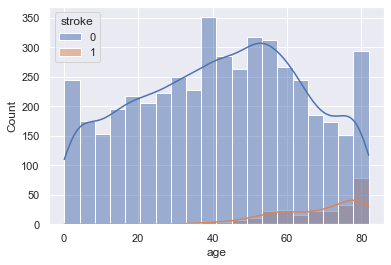

In [268]:
sns.histplot(data=data, x='age', hue='stroke', kde=True)

<AxesSubplot:xlabel='stroke', ylabel='age'>

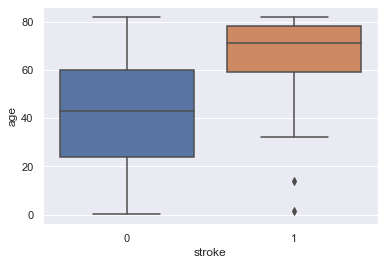

In [269]:
sns.boxplot(data=data, x='stroke', y='age')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

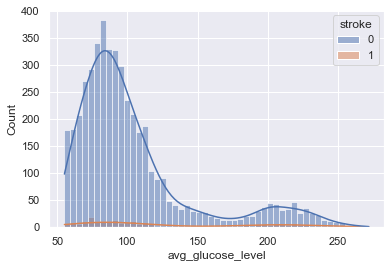

In [270]:
sns.histplot(data=data, x='avg_glucose_level', hue='stroke', kde=True)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

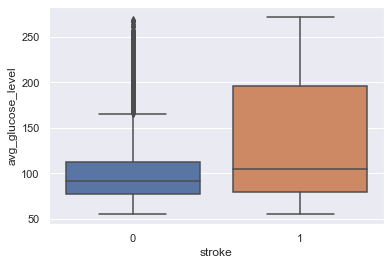

In [271]:
sns.boxplot(data=data, x='stroke', y='avg_glucose_level')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

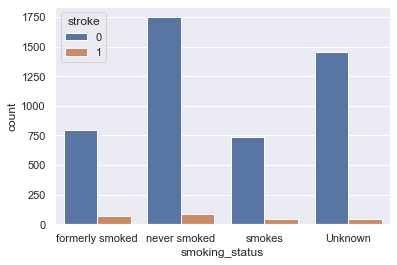

In [272]:
sns.countplot(data=data, x='smoking_status', hue='stroke')

<AxesSubplot:xlabel='gender', ylabel='count'>

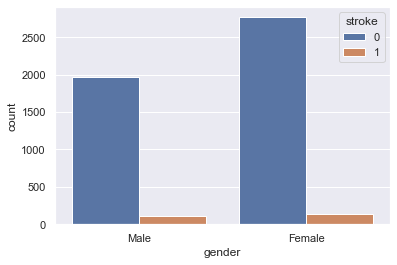

In [273]:
sns.countplot(data=data, x='gender', hue='stroke')

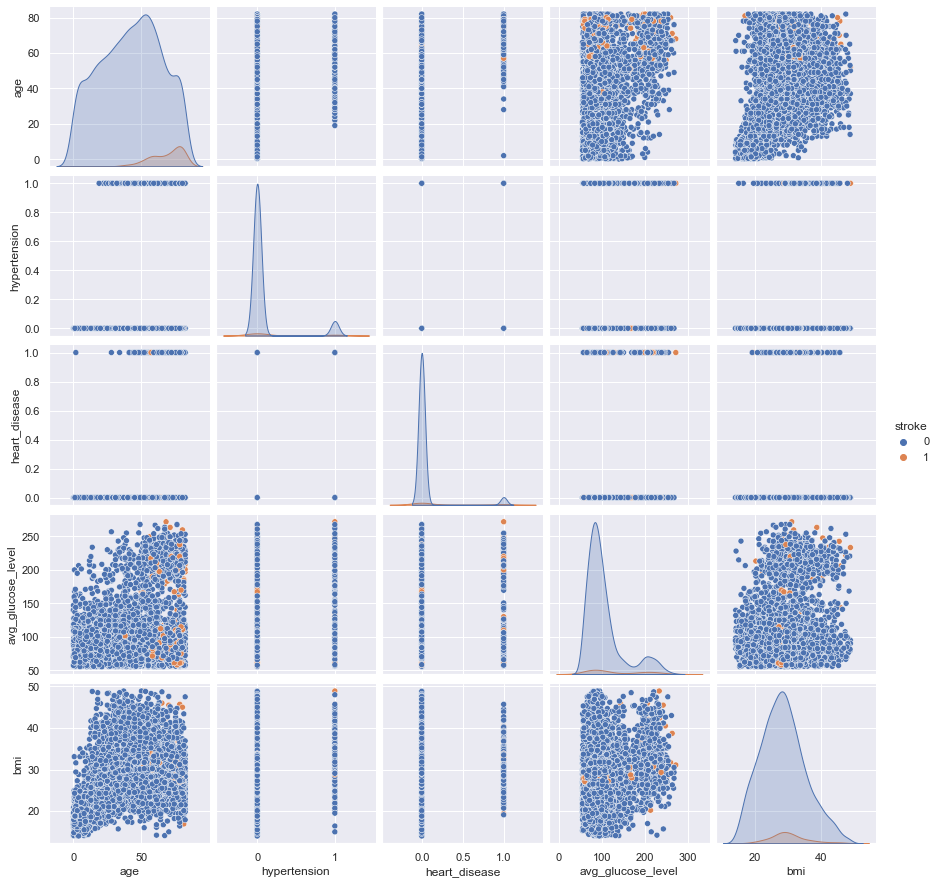

In [274]:
sns.pairplot(data=data, hue='stroke')

## Indexing

In [275]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [276]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [277]:
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
data['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

In [278]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [279]:
data['ever_married'].replace(['Yes','No'],[0,1], inplace=True)
data['ever_married'].head()

0    0
1    0
2    0
3    0
4    0
Name: ever_married, dtype: int64

In [280]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [281]:
data['work_type'].replace(['Private','Self-employed','Govt_job','children'],[0,1,2,3], inplace=True)
data['work_type'].head()

0    0
1    0
2    0
3    1
4    0
Name: work_type, dtype: int64

In [282]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [283]:
data['Residence_type'].replace(['Urban','Rural'],[0,1], inplace=True)
data['Residence_type'].head()

0    0
1    1
2    0
3    1
4    0
Name: Residence_type, dtype: int64

## Model

In [284]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

In [286]:
train,test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['stroke'])
train_X = train[train.columns[:-1]]
train_Y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_Y = test[test.columns[-1:]]

In [287]:
len(train_X), len(train_Y), len(test_X), len(test_Y)

(3486, 3486, 1495, 1495)

In [288]:
model = LogisticRegression()

In [289]:
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
accuracy = round(metrics.accuracy_score(prediction,test_Y),2)
print('Accuracy of Model:',accuracy)

Accuracy of Model: 0.95


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
